# Individual Zip Code Analysis#

Now that you've seen a basic analysis over general data, you will to look at data from your <b>own zipcode</b> and test the predictions you made in the previous notebook.

## A Few Reminders

* Each block of code or text is called a "cell"
* To select a cell, click on it. You should see an outline around the cell you have selected. To edit a cell, double click it (you'll be doing this to answer questions).
* To run a cell, first select it, then hold down shift and press enter. That's it!
* It's important to run cells in order, starting from the top of the notebook. All of the code works together, and relies on being run in the correct order for everything to work!
* Don't hesitate to ask questions, whether about how to use the notebook, about the data set, or anything else related!

## The Data

In this notebook, you'll be working with data from your own home zip code. This data was collected from <a href = http://politicaldata.com/>Political Data, Inc.</a> and features demographics such as <b>age</b>, <b>gender</b>, and <b>ethnicity</b>. You will also get to work with data for people who vote by mail, and analyze possible relationships between certain demographics and submission time. 

## Goals

By working through this notebook, you will:
* Test the predictions you've made previously on your own home zip code
* Form theories about voter tendencies 
* Analyze data, and use it to support your predictions

### Before You Begin
Think about and add to the predictions you made on Monday about possible voting trends in your home area based on certain demographics. List them out here.

### <span style="color:red">ANSWER:</span>

(your answer here)

### Code Import

In [1]:
# Import some useful libraries
from datascience import * 
import numpy as np
import matplotlib 

## IMPORTANT: Input your zipcode in next cell
In order to get the data for your own zip code, make sure to change  'YOUR ZIPCODE' to your own home zipcode.

In [2]:
# Replace 'YOUR ZIPCODE' with your own zip code (i.e. 92603, 94704)
# zipcode = 'YOUR ZIPCODE'
zipcode = 92603

### Party v Race ###
Running the following two cells displays a table and a bar graph of the breakdown of Democrats and Republicans per stated race in your zipcode. Notice that there are high counts listed under 'No Ethnic ID'.

In [6]:
# Generates table of the number of democrats/republicans per race in your zipcode

# We load in the table
party_race = Table().read_table("Party v Race.csv")

# We look at data that matches our zipcode only, and group the data (votes) by race
party_race = party_race.where(party_race['Zip'] == zipcode).group('Race',sum)

# We relabel the data to make it more clear
party_race = party_race.relabeled('D sum', 'Democrat').relabeled('R sum', 'Republican').drop('Zip sum')

# We display the table below
party_race.show()

Race,Democrat,Republican
African American,9,16
Arabic,13,3
Armenian,29,29
Asian - Anglo,22,17
Chinese,191,231
Chinese - Korean,34,21
Chinese - Korean - Viet,3,4
Chinese - Vietnamese,8,8
East Indian,127,36
Filipino,33,43


In [7]:
# Generates bar graph of number of democrats/republicans per race for your zipcode 
party_race.drop('Zip').barh('Race')

### Party v Gender 
Running the following two cells displays a table and bar graph of the number of Males and Females per major party in your zipcode.

In [8]:
# We load in the table from the file called "Party v Gender.csv"
party_gender = Table().read_table("Party v Gender.csv")

# Again, we match only the data that matches our zipcode.
party_gender = party_gender.where(party_gender['Zipcode'] == zipcode).drop('Zipcode')

# We group the data based on political party and gender
pg = Table().with_columns(["Party", ["Democrat", "Republican", "Did not state"],
                          "Male", party_gender.row(0)[1:],
                          "Female", party_gender.row(1)[1:]])
pg

Party,Male,Female
Democrat,1039,1328
Republican,1660,1613
Did not state,993,987


In [9]:
# Generates bar graph of # democrats/republicans/did not state per gender in your zipcode 
pg.barh("Party")

### Party v Age 
Running the following two cells displays a table and bar graph of the number of people in each age group per major party in your zipcode.

In [53]:
# Generates table of # democrats/republicans/did not state per age group for your zipcode 
party_age = Table().read_table("Party v Age.csv")
party_age = party_age.where(party_age['Zip'] == zipcode).drop("Zip")
party_age.show()

Age,D,R,DS
Age1824,353,191,372
Age2534,467,367,479
Age3544,460,487,531
Age4554,617,757,754
Age5564,577,882,535
Age65NA,669,1174,463


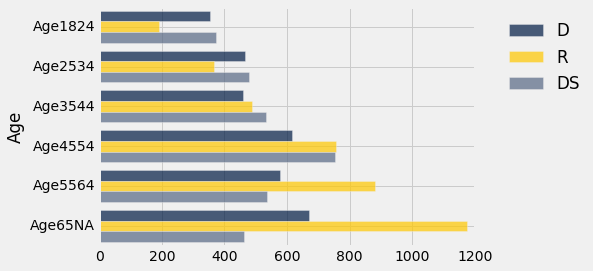

In [54]:
# Generates bar graph of # democrats/republicans/did not state per age group for your zipcode 
party_age.drop('Zip').barh('Age')

## Data Analysis
Now that you've been exposed to data from your own zip code, you can now test your hypothesis and draw conclusions. Using the data shown above about your home zipcode, compare your previous predictions on how people in your area vote and general trends to the actual data.
1. How does your hypothesis of how voters in your area will vote change or expand? 
2. Which demographic do you think is the most impactful in your area? 

### <span style="color:red">ANSWERS:</span>

1. (answer to 1. here)

2. (answer to 2. here)

# Vote By Mail Data Analysis
We will now introduce additional data that could help you understand more about voting trends and demographic impacts. This set of data is based on people who always vote by mail, and is further sectioned by demographics and submission time.

### Submission Time Key

AE -	Always early

SE -	Sometimes Early

EL -	Early or Late

SL -	Sometimes Late

AL -	Always Late

### Submission Time v Age
This data counts number per party in each age group. To look at data for a specific submission time, change the following variable called `vbm_age_time` to be one of the abbreviated submission times listed in the key above (i.e. 'AE' or 'SE')

In [62]:
# Update this variable to submission time, 'SE' to see data for the various submission times listed in the key above
vbm_age_time = 'AE'

In [63]:
# Table of # democrats, republicans, did not state/other per age group for input submission time 
vbm_age = Table().read_table("VBM_age.csv").relabeled('Unnamed: 0', 'Age')

# We select the data that matches our desired submission time, and display it in a table
vbm_age.where(vbm_age['Submission Time'] == vbm_age_time).show()

Age,D,R,DS/O,Submission Time
Age1824,41,22,31,AE
Age2534,200,77,120,AE
Age3544,253,136,196,AE
Age4554,353,274,197,AE
Age5564,406,298,214,AE
Age65NA,1010,833,422,AE


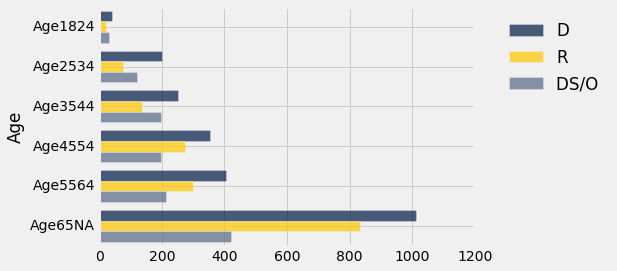

In [65]:
# Bar graph of # democrats, republicans, did not state/other per age group for input submission time 
vbm_age_bar = vbm_age.where(vbm_age['Submission Time'] == vbm_age_time)
vbm_age_bar.drop('Submission Time').barh('Age')

Look at the data using all the different submission times by changing the variable `vbm_age_time` above and re running the cells starting from that one. Are there trends or relationships between submission time and age for people who vote by mail? Can this be connected to the earlier data on your own zip code about party and age to make further inferences?

### <span style="color:red">ANSWER:</span>

(your answer here)

### Submission Time v Gender
This data counts number per party for male/female. To look at data for a specific submission time, change the following variable called `vbm_gender_time` to be one of the abbreviated submission times listed in the key above (i.e. 'AE' or 'SE')

In [66]:
vbm_gender_time = 'AE'

In [67]:
# Table of # democrats, republicans, did not state/other per gender for input submission time 
vbm_gender = Table().read_table("VBM_gender.csv")
vbm_gender.where(vbm_gender['Submission Time'] == vbm_gender_time)

Gender,D,R,DS,Submission Time
Male,1030,759,629,AE
Female,1178,856,502,AE
Other,55,25,49,AE


/opt/conda/lib/python3.5/site-packages/datascience/tables.py:193: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


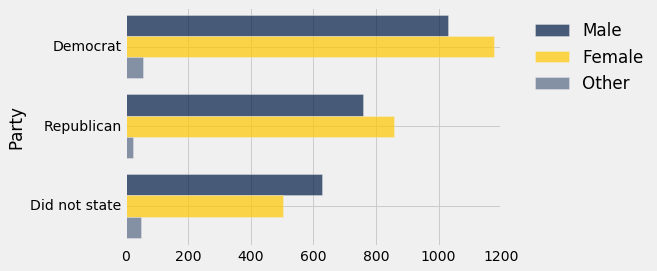

In [71]:
# Bar graph of # democrats, republicans, did not state/other per age group for input submission time

# Here, we select data that matches our submission time
vbm_gender_time = vbm_gender.where(vbm_gender['Submission Time'] == vbm_gender_time).drop('Submission Time')

# We create a table with columns based on poltical party seperated by gender.
vgt = Table().with_columns(["Party", ["Democrat", "Republican", "Did not state"],
                          "Male", vbm_gender_time.row(0)[1:],
                          "Female", vbm_gender_time.row(1)[1:],
                          "Other", vbm_gender_time.row(2)[1:]])
vgt.barh('Party')

Look at the data using all the different submission times by changing the variable `vbm_gender_time` above and re running the cells starting from that one. Are there trends or relationships between submission time and gender for people who vote by mail? Can this be connected to the earlier data on your own zip code about party and gender to make further inferences?

### <span style="color:red">ANSWER:</span>

(answer here)